# Assignment 04/02/2025

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

## Image loading, conversion to grayscale

In [ ]:
cam_image = cv2.imread('../images/zebra.jpg')
cam_image.min(), cam_image.max(), cam_image.shape

(0, 255, (3016, 4524, 3))

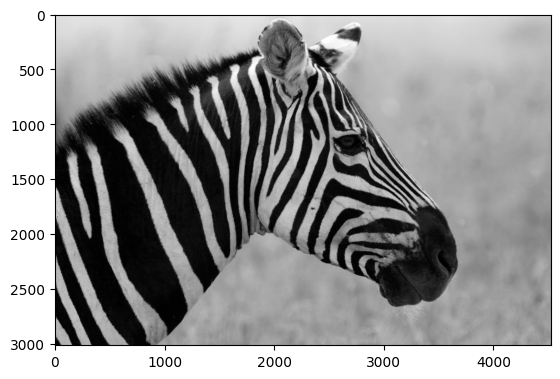

In [3]:
grayscale = cv2.cvtColor(cam_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap='gray')

## Applying DCT

In [4]:
# implement 2D DCT
def dct2(a):
    return fft.dct(fft.dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return fft.idct(fft.idct(a.T, norm='ortho').T, norm='ortho') 

In [24]:
F = dct2(grayscale)
F.shape

(3016, 4524)

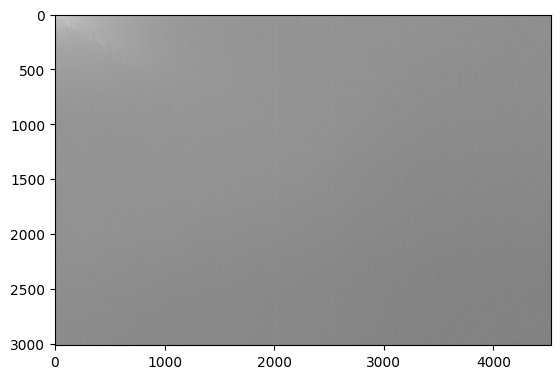

In [25]:
plt.imshow(np.log(np.abs(F)), cmap='gray')

## Applying compression

In [26]:
cutoff = 1500

In [27]:
rows, cols = grayscale.shape
crow, ccol = 0, 0
mask = np.ones((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
        mask[i, j] = 1 if dist <= cutoff else 0
        # if i > cutoff or j > cutoff: 
        #     mask[i, j] = 0

C:\Users\homea\AppData\Local\Temp\ipykernel_26084\2774948145.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(compressed_F)), cmap='gray')


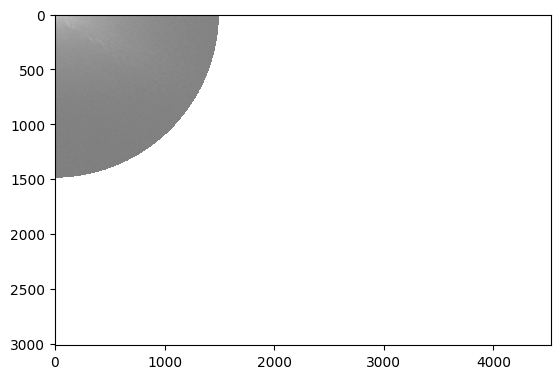

In [30]:
compressed_F = F * mask
plt.imshow(np.log(np.abs(compressed_F)), cmap='gray')

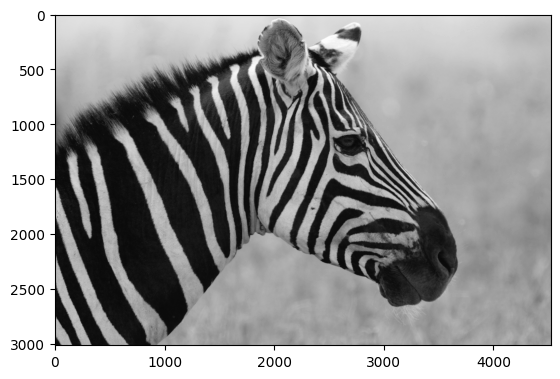

In [31]:
inv = idct2(compressed_F)
plt.imshow(inv, cmap='gray')

## Swapping Phases and Magnitudes

In [ ]:
zebra_image = cv2.imread("../images/zebra.jpg")
flower_image = cv2.imread("../images/flower.jpg")
zebra_grayscale = cv2.cvtColor(zebra_image, cv2.COLOR_BGR2GRAY)
flower_grayscale = cv2.cvtColor(flower_image, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Flower Image')

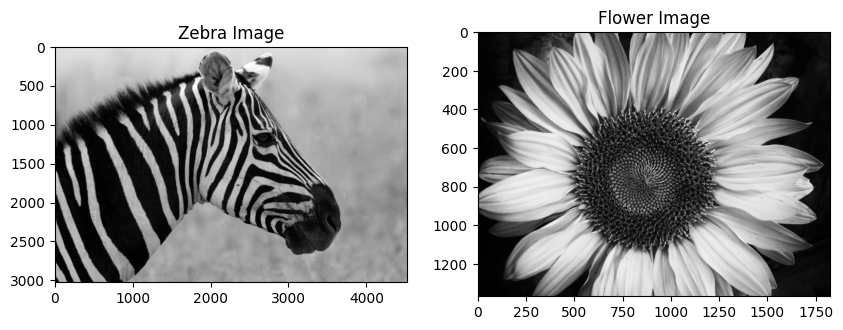

In [33]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(zebra_grayscale, cmap='gray', vmin=0, vmax=255)
plt.title("Zebra Image")

plt.subplot(1, 2, 2)
plt.imshow(flower_grayscale, cmap='gray', vmin=0, vmax=255)
plt.title("Flower Image")

In [34]:
def crop_center(img, crop_h, crop_w):
    h, w = img.shape[:2]
    start_h = (h - crop_h) // 2
    start_w = (w - crop_w) // 2
    return img[start_h:start_h + crop_h, start_w:start_w + crop_w]

def crop_to_common_size(img1, img2):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    common_h = min(h1, h2)
    common_w = min(w1, w2)
    return crop_center(img1, common_h, common_w), crop_center(img2, common_h, common_w)

In [35]:
zebra_crop, flower_crop = crop_to_common_size(zebra_grayscale, flower_grayscale)

In [36]:
F_zebra = fft.fft2(zebra_crop)
F_flower = fft.fft2(flower_crop)

In [37]:
zebra_magnitude = np.abs(F_zebra)
flower_magnitude = np.abs(F_flower)
zebra_phase = np.angle(F_zebra)
flower_phase = np.angle(F_flower)

In [38]:
F_zebra_swapped = zebra_magnitude * np.exp(1j * flower_phase)
F_flower_swapped = flower_magnitude * np.exp(1j * zebra_phase)

In [39]:
zebra_flower_swapped = fft.ifft2(F_zebra_swapped)
flower_zebra_swapped = fft.ifft2(F_flower_swapped)

In [40]:
zebra_flower_swapped = np.real(zebra_flower_swapped)
flower_zebra_swapped = np.real(flower_zebra_swapped)

(-0.5, 1823.5, 1367.5, -0.5)

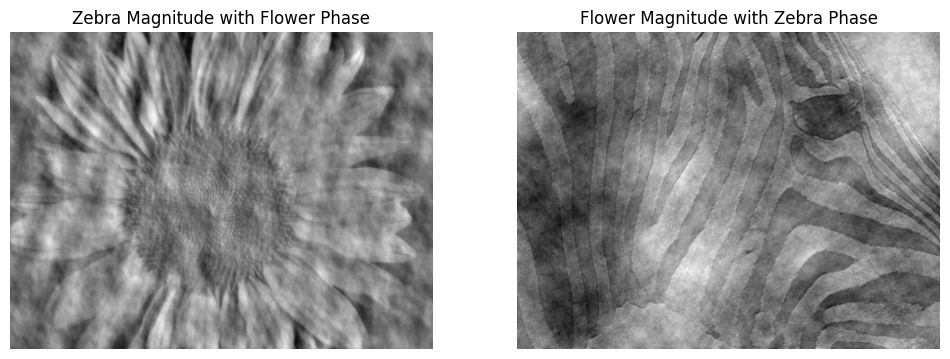

In [41]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(zebra_flower_swapped, cmap='gray')
plt.title('Zebra Magnitude with Flower Phase')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(flower_zebra_swapped, cmap='gray')
plt.title('Flower Magnitude with Zebra Phase')
plt.axis('off')